### Midterm Activity 1
Feature Selection <br>
Due Date: June 21, 2025

Objectives:
1. Discuss the importance of feature selection.
2. Implement the different techniques of feature selection.

I. Exploring Feature Selection

In [17]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = pd.read_csv("../data/train.csv")
X = data.iloc[:,0:20] #independent columns
y = data.iloc[:,-1] #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] #naming the dataframe columns
print(featureScores.nlargest(10,'Score')) #print 10 best features

            Specs          Score
13            ram  931267.519053
11      px_height   17363.569536
0   battery_power   14129.866576
12       px_width    9810.586750
8       mobile_wt      95.972863
6      int_memory      89.839124
15           sc_w      16.480319
16      talk_time      13.236400
4              fc      10.135166
14           sc_h       9.614878


[0.0607873  0.0201292  0.03373948 0.0197178  0.03302779 0.01823232
 0.03521847 0.03322937 0.03630269 0.03379413 0.03359218 0.04719865
 0.04987396 0.3909555  0.03362416 0.03452799 0.03421869 0.01416418
 0.01790782 0.01975833]


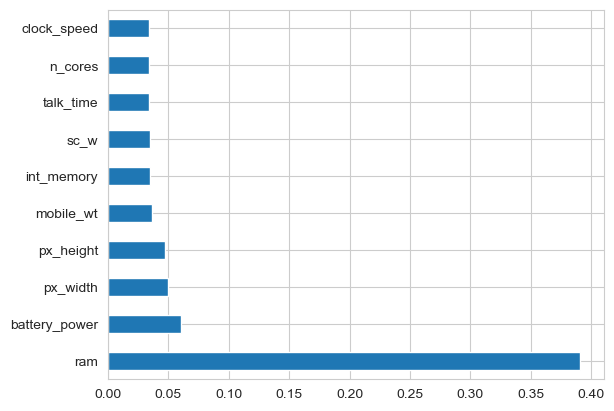

In [18]:
X = data.iloc[:,0:20] #independent columns
y = data.iloc[:,-1] #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

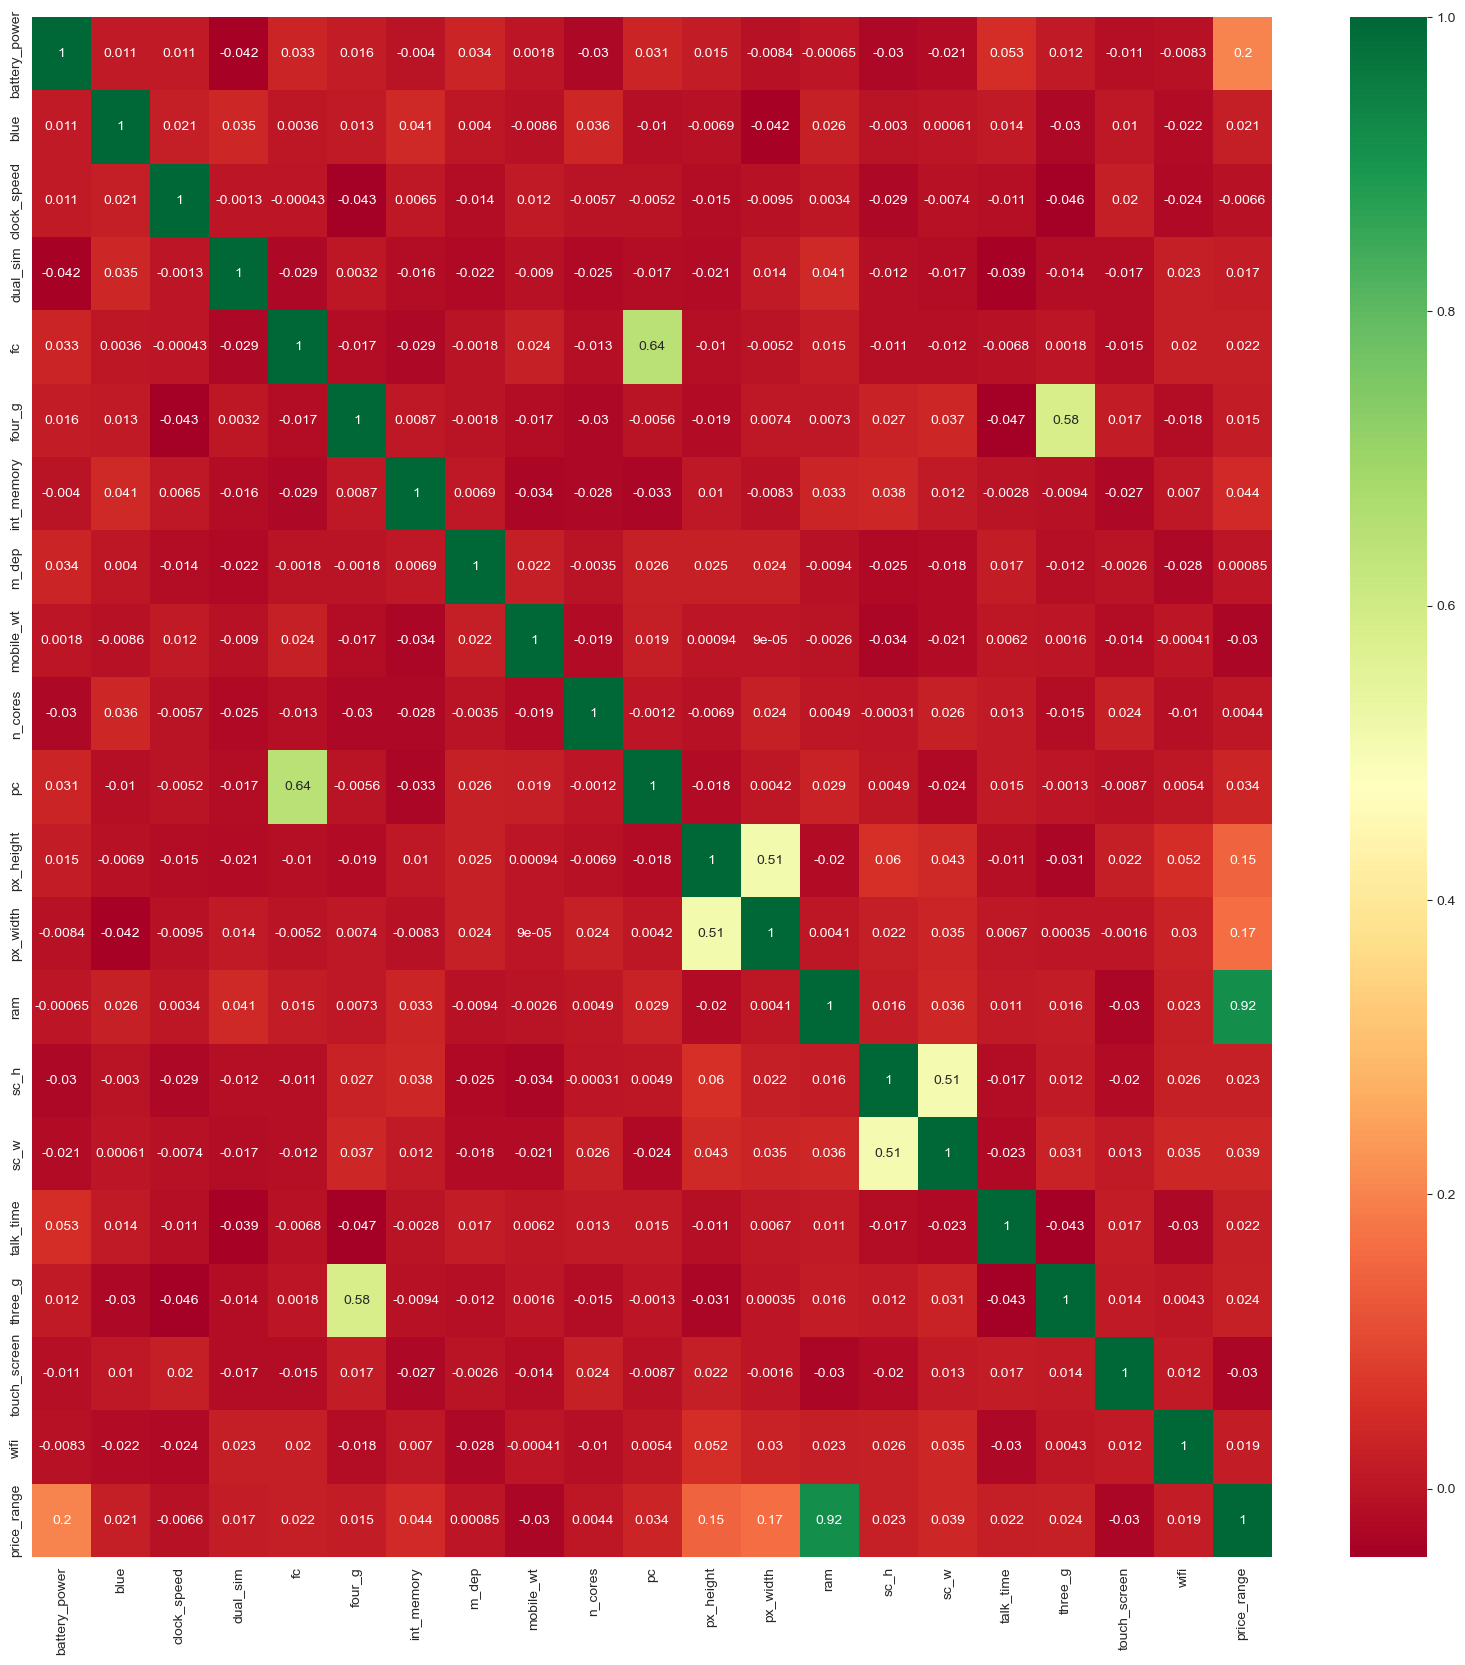

In [19]:
import seaborn as sns
X = data.iloc[:,0:20] #independent columns
y = data.iloc[:,-1] #target column i.e price range
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

II. Classification Model Development
1. Create a Naive Bayes classification model for the glass.csv dataset. The glass dataset contains
    information about the chemical composition of the different types of glass used in different industries.
    The glass type is classified according to the following:
    
    Type of glass: (class attribute)
    
        1 - building_windows_float_processed
        2 - building_windows_non_float_processed
        3 - vehicle_windows_float_processed
        4 - vehicle_windows_non_float_processed (none in this database)
        5 - containers
        6 - tableware
        7 - headlamps

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from scipy.stats import pearsonr

2. Ensure that the steps in developing a model must be presented in your Python scripts. These include the
    following
    
        A. Data Exploration

In [21]:
np.random.seed(10)
glass_df = pd.read_csv("../data/glass.csv")
print("Dataset Shape:", glass_df.shape)
print("\nFirst 5 Rows:")
print(glass_df.head())
print("\nData Types:\n", glass_df.dtypes)
print("\nMissing Values:\n", glass_df.isnull().sum())
print("\nClass Distribution:\n", glass_df['type'].value_counts())
duplicates = glass_df[glass_df.duplicated()]
print(f"\nNumber of duplicate rows: {len(duplicates)}")
print("\nSummary Statistics:\n", glass_df.describe())

Dataset Shape: (214, 11)

First 5 Rows:
   idno       RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  type
0     1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1     2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2     3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3     4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4     5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1

Data Types:
 idno      int64
RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
type      int64
dtype: object

Missing Values:
 idno    0
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
type    0
dtype: int64

Class Distribution:
 type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

Number of duplicate rows: 0

Summary Statistics:
              idno          RI        

    B. Data Preprocessing

In [22]:
# Drop 'idno' column
glass_df = glass_df.drop('idno', axis=1)

# Prepare features (x) and target (y)
x = glass_df.drop('type', axis=1)
y = glass_df['type']

    C. Developing the Model

In [23]:
# Univariate selection
selector_uni = SelectKBest(score_func=chi2, k=5)
selector_uni.fit(x, y)
top5_uni = x.columns[selector_uni.get_support()].tolist()

# Feature Importance 
model_imp = ExtraTreesClassifier(random_state=10)
model_imp.fit(x, y)
importances = pd.Series(model_imp.feature_importances_, index=x.columns)
top5_imp = importances.nlargest(5).index.tolist()

# Correlation 
correlations = x.apply(lambda col: abs(col.corr(pd.Series(LabelEncoder().fit_transform(y)))))
top5_corr = correlations.nlargest(5).index.tolist()

gnb = GaussianNB()

# Define feature sets
feature_sets = {
    "All Attributes": x.columns.tolist(),
    "Univariate Selection": top5_uni,
    "Feature Importance": top5_imp,
    "Correlation": top5_corr
}



3. Determine the top 5 features for the given dataset using the following feature selection techniques:

        A. Univariate Selection

In [24]:
print("\nTop 5 Features by Univariate Selection:")
uni_scores = pd.DataFrame({'Feature': x.columns, 'Score': selector_uni.scores_})
print(uni_scores.sort_values('Score', ascending=False).head(5).to_string(index=False))



Top 5 Features by Univariate Selection:
Feature      Score
     Ba 145.514077
     Mg 100.984212
      K  31.670632
     Al  16.977488
     Na   4.311253


    B. Feature Importance

In [25]:
print("Top 5 Features by Feature Importance:")
imp_scores = pd.DataFrame({'Feature': x.columns, 'Importance': model_imp.feature_importances_})
print(imp_scores.sort_values('Importance', ascending=False).head(5).to_string(index=False))

Top 5 Features by Feature Importance:
Feature  Importance
     Mg    0.180250
     RI    0.137063
     Al    0.133596
     Ca    0.131906
      K    0.108076


    C. Correlation

In [26]:
print("Top 5 Features by Correlation:")
corr_scores = []
for feature in x.columns:
    corr, _ = pearsonr(x[feature], LabelEncoder().fit_transform(y))
    corr_scores.append(abs(corr))
    
corr_df = pd.DataFrame({'Feature': x.columns, 'Correlation': corr_scores})
print(corr_df.sort_values('Correlation', ascending=False).head(5).to_string(index=False))

Top 5 Features by Correlation:
Feature  Correlation
     Mg     0.728160
     Al     0.591198
     Ba     0.577676
     Na     0.506424
     Fe     0.183207


4. Evaluating the model

        a. Use the appropriate performance metrics to evaluate the developed models.
        b. To assess the constructed model's performance, use 8-fold cross validation with a 80%–20% split between training and test data. For uniformity of results, use seed = 10.

In [27]:
from sklearn.exceptions import UndefinedMetricWarning
import warnings

# Suppress specific warnings that are not related
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

# Performance metrics
results = []

# Evaluate models using 8-fold CV (80-20 split)
for feature_name, features in feature_sets.items():
    x_subset = x[features]
    
    # Cross-validation with 8 folds
    cv_results = cross_validate(
        gnb, x_subset, y, cv=8, scoring=('accuracy', 'precision_macro', 'recall_macro', 'f1_macro')
    )
    
    # Calculate mean metrics
    metrics = {
        "Accuracy": np.mean(cv_results['test_accuracy']),
        "Precision": np.mean(cv_results['test_precision_macro']),
        "Recall": np.mean(cv_results['test_recall_macro']),
        "F1-Score": np.mean(cv_results['test_f1_macro'])
    }
    results.append((feature_name, metrics))

# Display results
results_df = pd.DataFrame(
    [(name, metrics["Accuracy"], metrics["Precision"], metrics["Recall"], metrics["F1-Score"], ', '.join(feature_sets[name])) 
     for name, metrics in results],
    columns=["Attributes/Features", "Accuracy", "Precision", "Recall", "F1-Score", "Selected Features"]
)
print("\nModel Performance Comparison:")
results_df


Model Performance Comparison:


,Attributes/Features,Accuracy,Precision,Recall,F1-Score,Selected Features
0,All Attributes,0.429309,0.427880,0.459838,0.420357,"RI, Na, Mg, Al, Si, K, Ca, Ba, Fe"
1,Univariate Selection,0.433939,0.416295,0.480035,0.424857,"Na, Mg, Al, K, Ba"
2,Feature Importance,0.429487,0.329219,0.430093,0.317847,"Mg, RI, Al, Ca, K"
3,Correlation,0.228632,0.238792,0.309838,0.205079,"Mg, Al, Ba, Na, Fe"


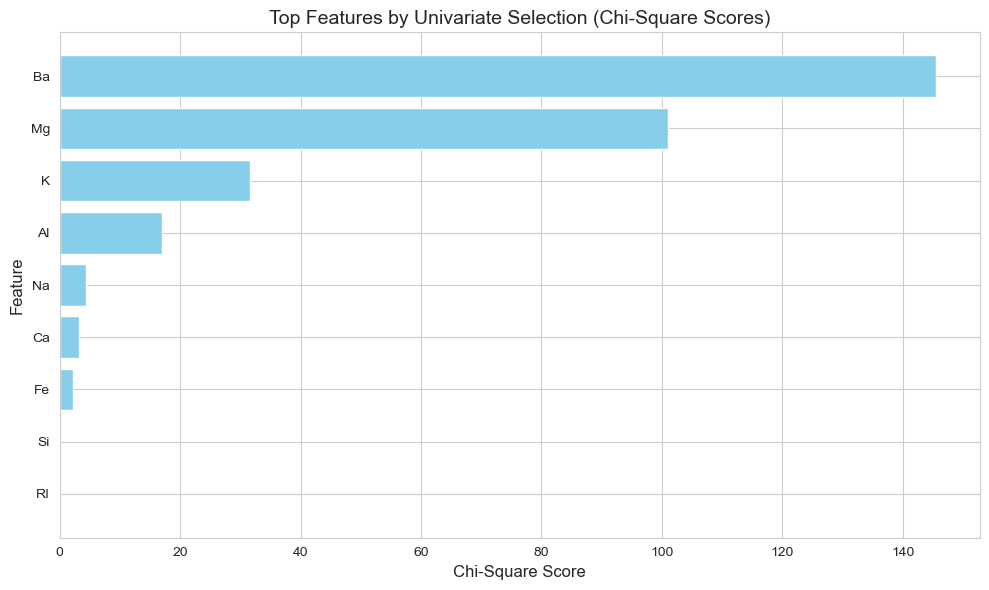

In [28]:
# Top Features by Univariate Selection
plt.figure(figsize=(10, 6))
uni_scores_sorted = uni_scores.sort_values('Score', ascending=True)
plt.barh(uni_scores_sorted['Feature'], uni_scores_sorted['Score'], color='skyblue')
plt.title('Top Features by Univariate Selection (Chi-Square Scores)', fontsize=14)
plt.xlabel('Chi-Square Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

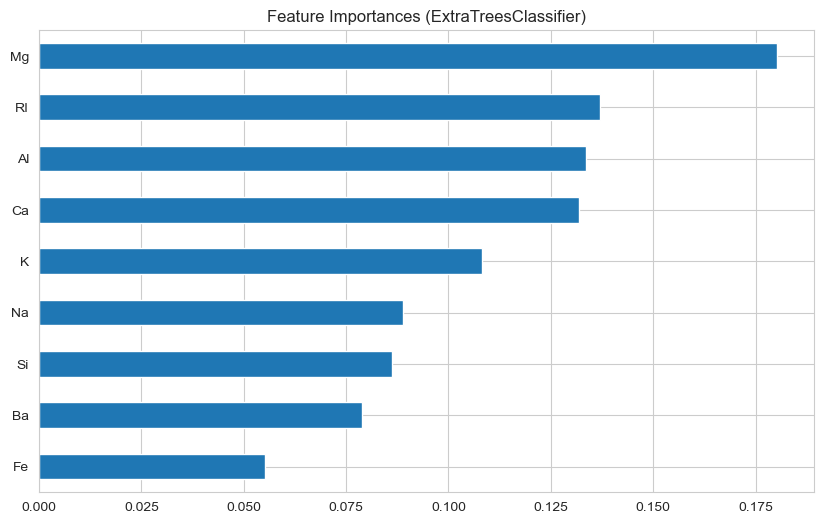

In [29]:
# Feature Importances
plt.figure(figsize=(10, 6))
importances.sort_values().plot(kind='barh')
plt.title('Feature Importances (ExtraTreesClassifier)')
plt.show()


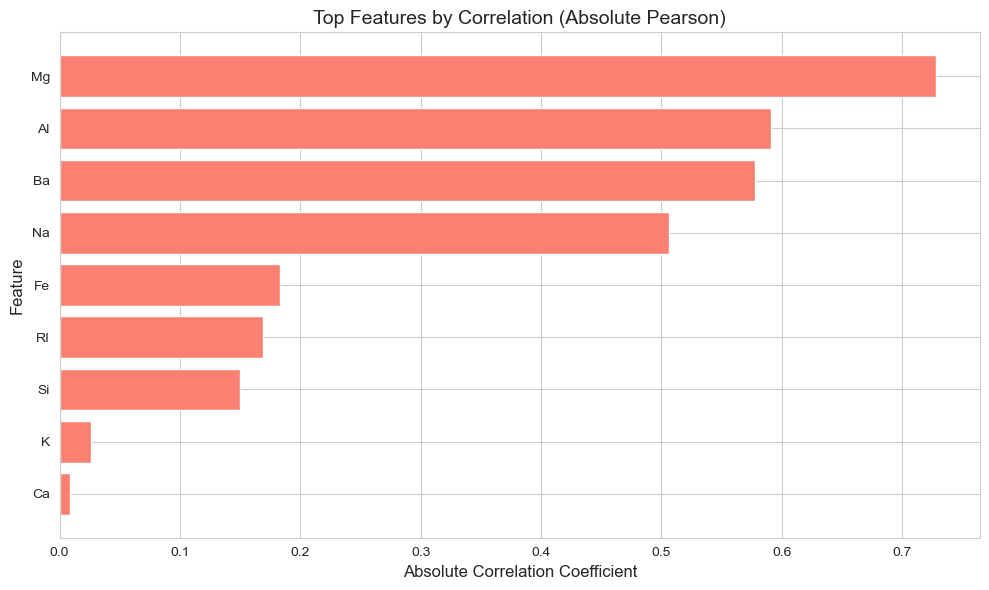

In [30]:
# Top Features by Correlation
plt.figure(figsize=(10, 6))
corr_df_sorted = corr_df.sort_values('Correlation', ascending=True)
plt.barh(corr_df_sorted['Feature'], corr_df_sorted['Correlation'], color='salmon')
plt.title('Top Features by Correlation (Absolute Pearson)', fontsize=14)
plt.xlabel('Absolute Correlation Coefficient', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

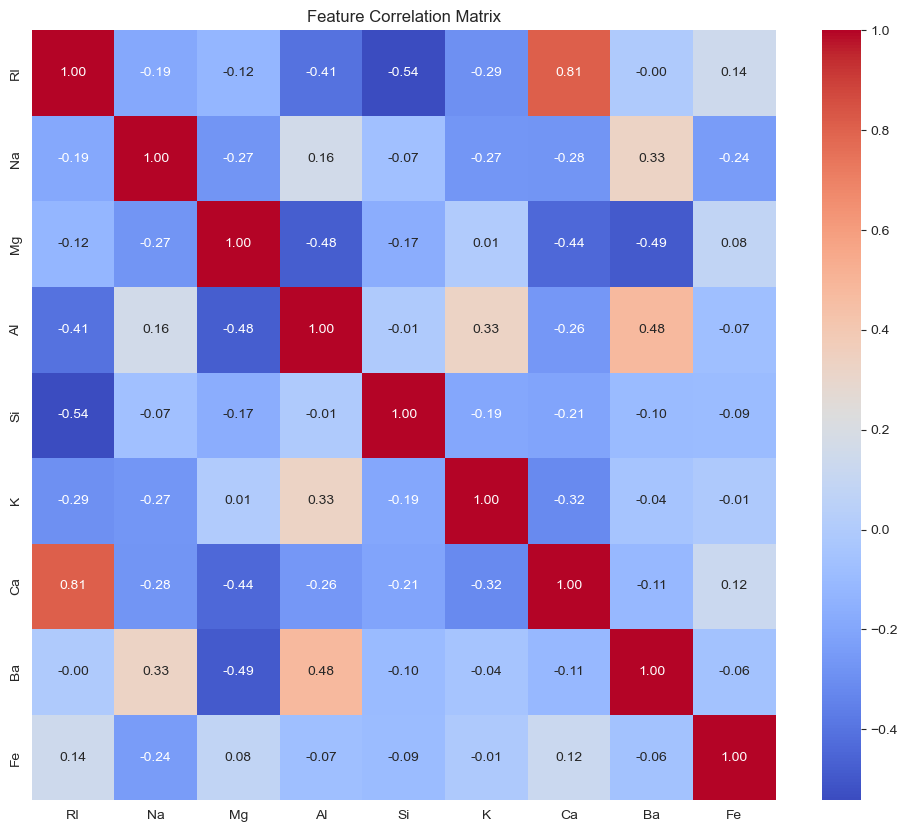

In [31]:
# Correlation Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(x.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()